In [1]:
import pandas as pd
import numpy as np
import tabulate as tab
import numbers

dataset = pd.read_csv('titanic.csv')
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
test_dataset = pd.read_csv('titanic_test.csv')
test_dataset["Sex"] = test_dataset["Sex"].astype('category').cat.codes
test_dataset

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",1,NaN,0,0,359309,8.0500,NaN,S


In [3]:
train_data = dataset[["Sex","Age","Pclass","Fare"]]
train_data["Age"].fillna(
    dataset.groupby(["Survived"])["Age"].transform("mean"),
    inplace=True
)
train_data["Sex"] = train_data["Sex"].astype('category').cat.codes
train_data

,Sex,Age,Pclass,Fare
0,1,22.000000,3,7.2500
1,0,38.000000,1,71.2833
2,0,26.000000,3,7.9250
3,0,35.000000,1,53.1000
4,1,35.000000,3,8.0500
...,...,...,...,...
886,1,27.000000,2,13.0000
887,0,19.000000,1,30.0000
888,0,30.626179,3,23.4500
889,1,26.000000,1,30.0000


In [4]:
train_label = dataset[["Survived"]]
train_label

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [5]:
test_data = test_dataset[["Sex","Age","Pclass","Fare"]]
deletedIdx = []
for i in range(0, len(test_data)):
    if test_data["Age"][i] >= 0 and test_data["Fare"][i] >= 0:
        pass
    else:
        deletedIdx.append(i)
test_data = test_data.dropna(subset=['Age',"Fare"])
test_data

,Sex,Age,Pclass,Fare
0,1,34.5,3,7.8292
1,0,47.0,3,7.0000
2,1,62.0,2,9.6875
3,1,27.0,3,8.6625
4,0,22.0,3,12.2875
...,...,...,...,...
409,0,3.0,3,13.7750
411,0,37.0,1,90.0000
412,0,28.0,3,7.7750
414,0,39.0,1,108.9000


In [6]:
test_label = pd.read_csv('titanic_testlabel.csv')["Survived"]
test_label = test_label.drop(deletedIdx)
test_label

0      0
1      1
2      0
3      0
4      1
      ..
409    1
411    1
412    1
414    1
415    0
Name: Survived, Length: 331, dtype: int64

In [7]:
train_data["Age"] = pd.cut(train_data["Age"], bins=[-1,14.9,39.9,59.0,999], labels=["Anak_Anak","Dewasa","Paruh_Baya","Tua"])
train_data["Age"] = train_data["Age"].astype('category').cat.codes
train_data["Fare"] = pd.cut(train_data["Fare"], bins=[-1,20,60.9,90.9,999], labels=["Low","Mid","High","Very_High"])
train_data["Fare"] = train_data["Fare"].astype('category').cat.codes

test_data["Age"] = pd.cut(test_data["Age"], bins=[-1,14.9,39.9,59.0,999], labels=["Anak_Anak","Dewasa","Paruh_Baya","Tua"])
test_data["Age"] = test_data["Age"].astype('category').cat.codes
test_data["Fare"] = pd.cut(test_data["Fare"], bins=[-1,20,60.9,90.9,999], labels=["Low","Mid","High","Very_High"])
test_data["Fare"] = test_data["Fare"].astype('category').cat.codes

print(train_data)
print()
print(test_data)

Sex  Age  Pclass  Fare
0      1    1       3     0
1      0    1       1     2
2      0    1       3     0
3      0    1       1     1
4      1    1       3     0
..   ...  ...     ...   ...
886    1    1       2     0
887    0    1       1     1
888    0    1       3     1
889    1    1       1     1
890    1    1       3     0

[891 rows x 4 columns]

     Sex  Age  Pclass  Fare
0      1    1       3     0
1      0    2       3     0
2      1    3       2     0
3      1    1       3     0
4      0    1       3     0
..   ...  ...     ...   ...
409    0    0       3     0
411    0    1       1     2
412    0    1       3     0
414    0    1       1     3
415    1    1       3     0

[331 rows x 4 columns]


In [10]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion="entropy", max_depth=4)
classifier = classifier.fit(train_data, train_label)
pred = classifier.predict(test_data)
score = classifier.score(test_data, test_label)
print("Accuracy: " + str(score))
print("Error: " + str(1-score))

Accuracy: 0.9577039274924471
Error: 0.04229607250755285


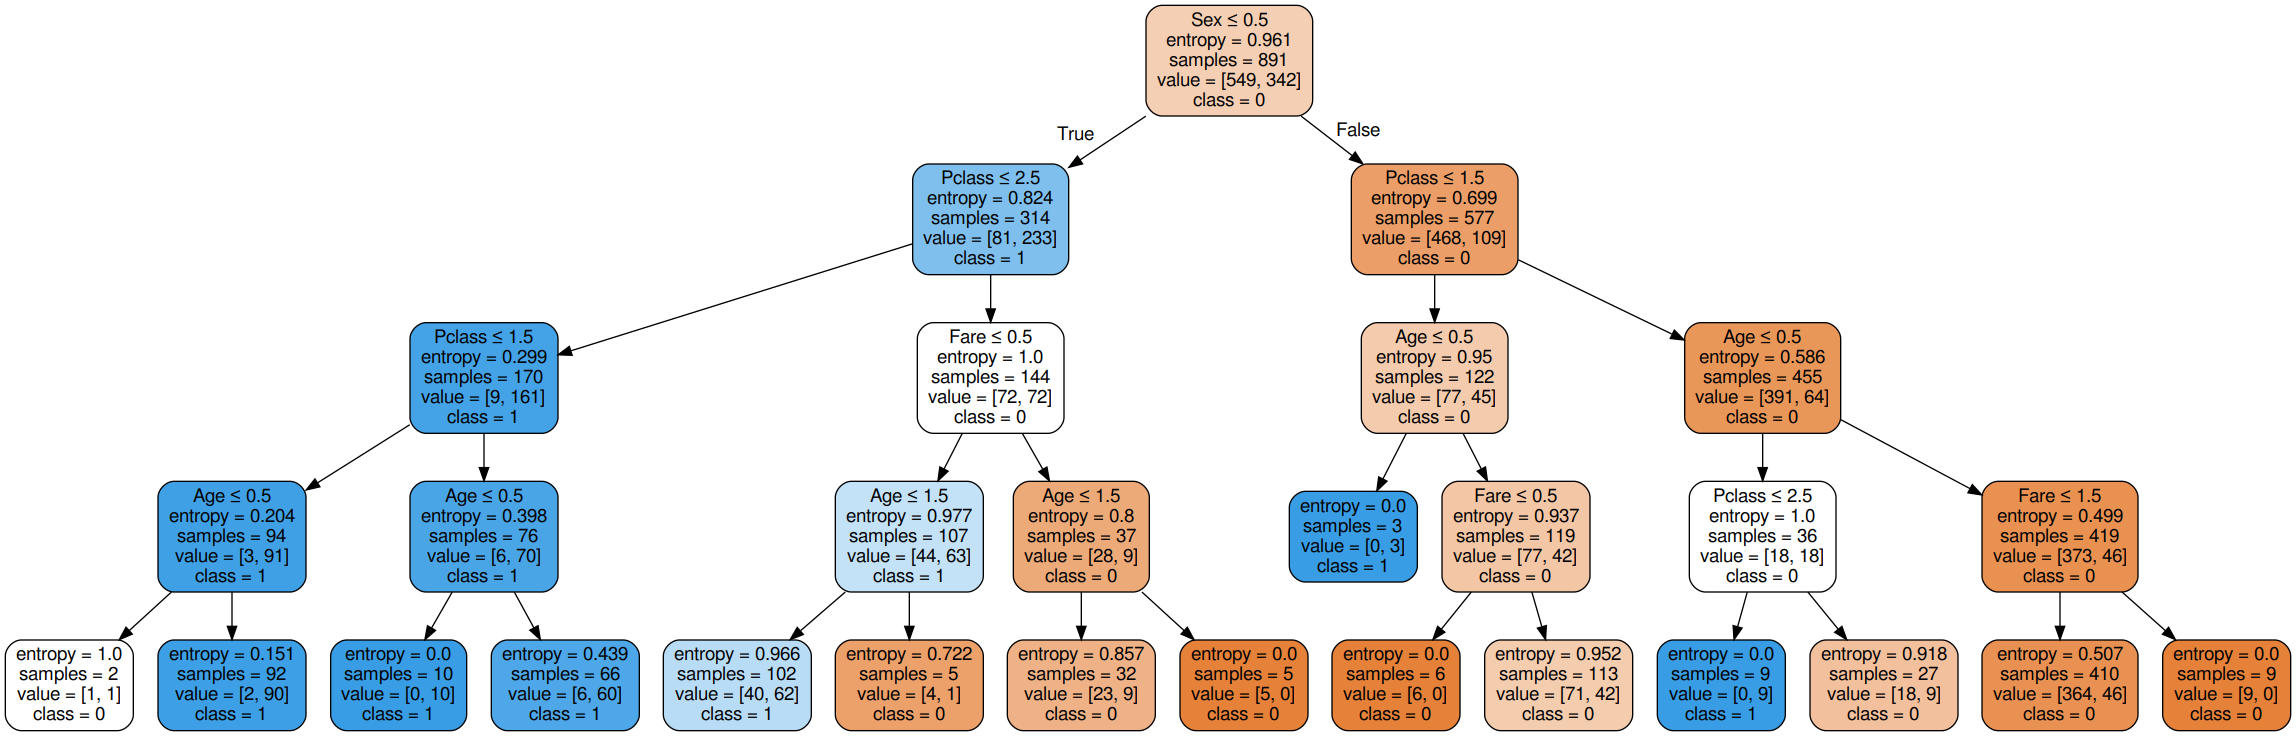

In [9]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(classifier,
                out_file=dot_data,filled=True,rounded=True,special_characters=True,
                feature_names=train_data.columns.values,class_names=["0","1"]
)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('result.png')
Image(graph.create_png())